In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

df=pd.read_excel('emdat_public_2023_05_02_query_uid-umjMCi.xlsx')

In [49]:
df

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000.0,843726.0,2.963048,NaN,NaN,NaN,NaN
3,1902-0003-GTM,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
4,1902-0010-GTM,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16626,2023-0110-ZMB,2023,110,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1;2,3430,65234;65235;65236,"Lusaka (Adm1). Mazabuka, Monze, Namwala (Adm2)."
16627,2023-0068-ZMB,2023,68,EP-2023-000013,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,...,NaN,NaN,NaN,NaN,NaN,NaN,1,3428;3429;3430;3433,NaN,"Eastern, Luapula, Lusaka, Southern (Adm1)."
16628,2023-0095-ZWE,2023,95,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Freddy',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16629,2023-0022-SRB,2023,22,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
unique_disasters=df['Disaster Type'].value_counts()

In [51]:
print(unique_disasters)

Flood                    5803
Storm                    4618
Earthquake               1597
Epidemic                 1518
Landslide                 804
Drought                   803
Extreme temperature       616
Wildfire                  456
Volcanic activity         270
Insect infestation         95
Mass movement (dry)        45
Glacial lake outburst       3
Fog                         1
Impact                      1
Animal accident             1
Name: Disaster Type, dtype: int64


In [52]:
flood_df = df[df['Disaster Type'] == 'Flood']

# Display flood dataframe
print(flood_df)


              Dis No  Year  Seq Glide Disaster Group Disaster Subgroup  \
12     1906-0023-BEL  1906   23   NaN        Natural      Hydrological   
13     1906-0024-BEL  1906   24   NaN        Natural      Hydrological   
34     1911-0002-CHN  1911    2   NaN        Natural      Hydrological   
39     1915-0011-CHN  1915   11   NaN        Natural      Hydrological   
43     1917-0013-CHN  1917   13   NaN        Natural      Hydrological   
...              ...   ...  ...   ...            ...               ...   
16615  2023-0226-TZA  2023  226   NaN        Natural      Hydrological   
16623  2023-0080-ZAF  2023   80   NaN        Natural      Hydrological   
16624  2023-0180-ZAF  2023  180   NaN        Natural      Hydrological   
16626  2023-0110-ZMB  2023  110   NaN        Natural      Hydrological   
16629  2023-0022-SRB  2023   22   NaN        Natural      Hydrological   

      Disaster Type Disaster Subtype Disaster Subsubtype Event Name  ...  \
12            Flood              Na

In [53]:
df= df.drop(columns=['Dis No','Glide'])

In [71]:
df = df.drop(df[df['Year'] >= 2000].index)

In [72]:
df

,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,CPV,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
1,1900,9001,Natural,Climatological,Drought,Drought,NaN,NaN,India,IND,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
2,1902,12,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,GTM,...,NaN,NaN,NaN,25000.0,843726.0,2.963048,NaN,NaN,NaN,NaN
3,1902,3,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,GTM,...,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
4,1902,10,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,GTM,...,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,1973,149,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,United States of America (the),USA,...,NaN,NaN,NaN,5750.0,37900.0,15.171453,NaN,NaN,NaN,NaN
15821,1975,155,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,United States of America (the),USA,...,NaN,NaN,NaN,1000.0,5438.0,18.389129,NaN,NaN,NaN,NaN
15822,1979,300,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Turkey,TUR,...,NaN,NaN,NaN,NaN,NaN,24.798841,NaN,NaN,NaN,NaN
15823,1983,538,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Indonesia,IDN,...,NaN,NaN,NaN,NaN,NaN,34.033264,NaN,NaN,NaN,NaN


In [73]:
catastrophes_par_annee = df.groupby('Year').size()

In [74]:
augmentation = catastrophes_par_annee.pct_change() * 100

In [75]:
import seaborn as sns

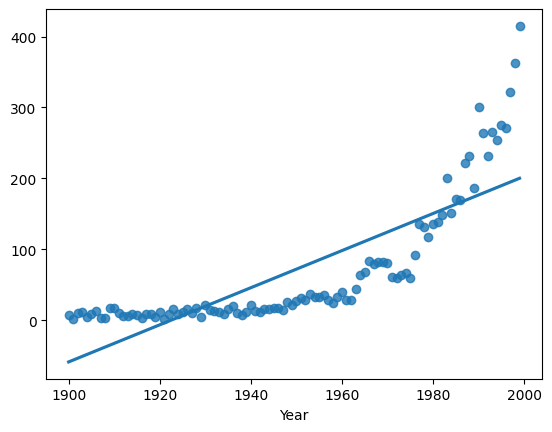

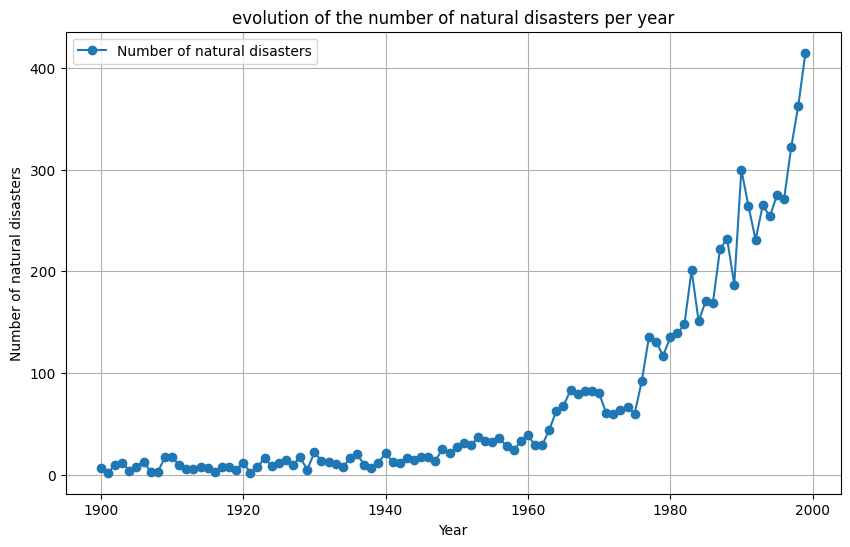

In [76]:
#Add linear regression on the plot
sns.regplot(x=catastrophes_par_annee.index, y=catastrophes_par_annee, ci=None, label='Number of natural disasters')
plt.figure(figsize=(10, 6))
plt.plot(catastrophes_par_annee.index, catastrophes_par_annee, marker='o', label='Number of natural disasters')
plt.xlabel('Year')
plt.ylabel('Number of natural disasters')
plt.title('evolution of the number of natural disasters per year')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

df['is_flood']=(df['Disaster Type']=='Flood').astype(int)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train SVM classifier on the training set
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

ValueError: could not convert string to float: 'Natural'

In [133]:
df2 = pd.read_csv('economic-damage-from-natural-disasters.csv')

In [134]:
df2 = df2.drop(df2[df2['Year'] >= 2018].index)

In [135]:
df2

,Entity,Code,Year,Total economic damage from natural disasters
0,All disasters,NaN,1900,30000000
1,All disasters,NaN,1901,0
2,All disasters,NaN,1902,25000000
3,All disasters,NaN,1903,480000000
4,All disasters,NaN,1904,0
...,...,...,...,...
849,Wildfire,NaN,2013,1074400000
850,Wildfire,NaN,2014,259000000
851,Wildfire,NaN,2015,3439820000
852,Wildfire,NaN,2016,6287000000


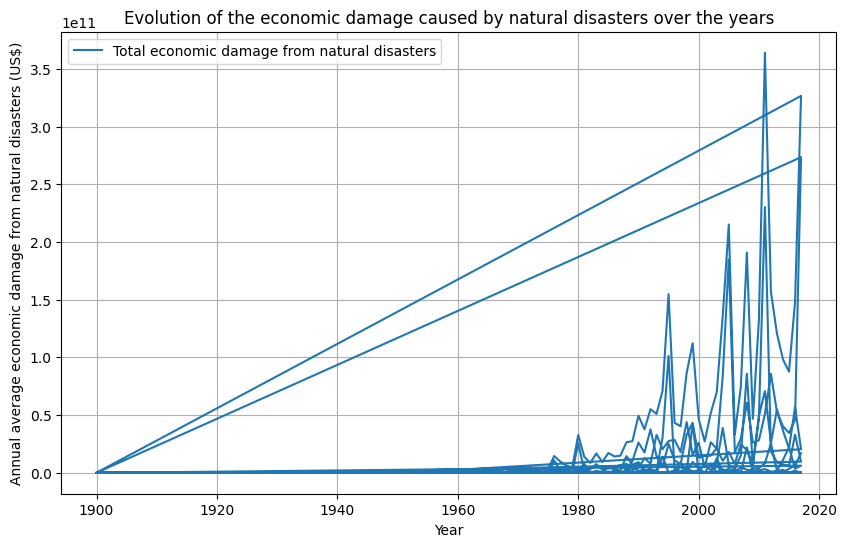

In [136]:
#Plot a graph showing the evolution of the economic damage caused by natural disasters over the years
df2.plot(x='Year', y='Total economic damage from natural disasters', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Annual average economic damage from natural disasters (US$)')
plt.title('Evolution of the economic damage caused by natural disasters over the years')
plt.grid(True)
plt.show()


In [137]:
df_grouped = df2.groupby('Year')['Total economic damage from natural disasters'].sum().reset_index()

In [138]:
def logistic_function(x, a, b, c):
    return c / (1 + np.exp(-a * (x - b)))

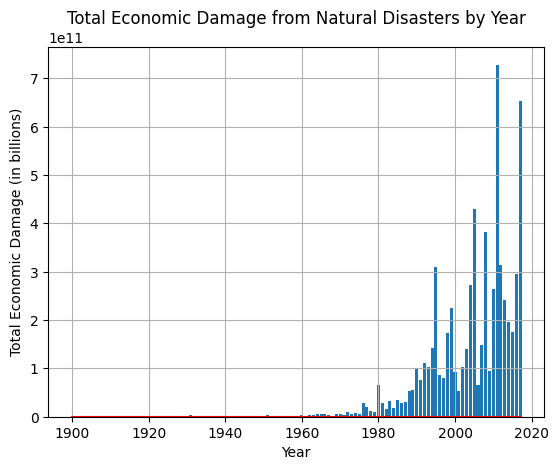

In [147]:
plt.bar(df_grouped['Year'], df_grouped['Total economic damage from natural disasters'])

# Add polynomial regression on the plot
popt, pcov = curve_fit(logistic_function, df_grouped['Year'], df_grouped['Total economic damage from natural disasters'])
plt.plot(df_grouped['Year'], logistic_function(df_grouped['Year'], *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))




plt.xlabel('Year')
plt.ylabel('Total Economic Damage (in billions)')
plt.title('Total Economic Damage from Natural Disasters by Year')
plt.grid(True)
plt.show()

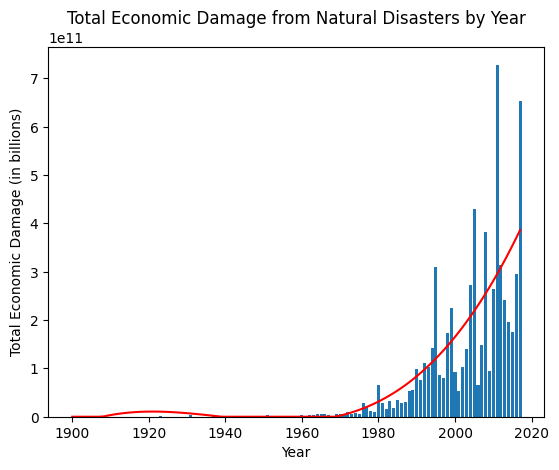

In [151]:
# Grouper les données par année et calculer la somme des dommages économiques
df_grouped = df2.groupby('Year')['Total economic damage from natural disasters'].sum().reset_index()

# Tracer le bar chart
plt.bar(df_grouped['Year'], df_grouped['Total economic damage from natural disasters'], label='Data')

# Ajuster une régression polynomiale de degré 3
x = df_grouped['Year']
y = df_grouped['Total economic damage from natural disasters']
coefficients = np.polyfit(x, y, deg=3)
poly = np.poly1d(coefficients)
x_regression = np.linspace(x.min(), x.max(), 100)
y_regression = poly(x_regression)

# Ajuster les valeurs de y pour qu'elles ne soient jamais dans le négatif
y_regression = np.where(y_regression < 0, 0, y_regression)

plt.plot(x_regression, y_regression, color='red', label='Polynomial Regression')

# Ajouter des étiquettes d'axe et un titre
plt.xlabel('Year')
plt.ylabel('Total Economic Damage (in billions)')
plt.title('Total Economic Damage from Natural Disasters by Year')

# Afficher le graphique
plt.show()
